# Off FaceBook Analysis Report
#### Josh Malone

In [2]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

My guess as to what apps will be present in this data is just that, a guess. I dont actively use facebook but I do have an account, so I am going to assume that any of the websites and apps listed in the data, are any of the websites I use on a regular basis, due to the fact that I use the same email and sign in to websites with Google all the time. With that being said, I assume that some of the websites will be sports related, like ESPN and Bleacher Report, as well as some sneaker apps like Sole Retriever and Sneaker Huddle. Additionally maybe educational related sites like Kent State.

In [3]:
with open(r"C:\Users\joshu\DataEMATfa22\facebook-joshmalone3726\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    fb_data = json.load(j)

In [4]:
fb_df = pd.DataFrame(fb_data)

In [5]:
fb_df

,off_facebook_activity_v2
0,"{'name': 'coursehero.com', 'events': [{'id': 1..."
1,"{'name': 'kent.edu', 'events': [{'id': 6619043..."
2,"{'name': 'espn.com', 'events': [{'id': 5044125..."
3,"{'name': 'LinkedIn NAMER', 'events': [{'id': 1..."
4,"{'name': 'linkedin.com', 'events': [{'id': 106..."
...,...
208,"{'name': 'marketwatch.com', 'events': [{'id': ..."
209,"{'name': 'whitney.org', 'events': [{'id': 1684..."
210,"{'name': 'Wish', 'events': [{'id': 53187958402..."
211,"{'name': 'Voter Participation Center', 'events..."


In [6]:
fb_df2 = pd.DataFrame(fb_data['off_facebook_activity_v2'])

In [7]:
fb_df2

,name,events
0,coursehero.com,"[{'id': 1915956025394562, 'type': 'PAGE_VIEW',..."
1,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ..."
2,espn.com,"[{'id': 504412503408123, 'type': 'PAGE_VIEW', ..."
3,LinkedIn NAMER,"[{'id': 136430647058082, 'type': 'CUSTOM', 'ti..."
4,linkedin.com,"[{'id': 1064772166942435, 'type': 'PAGE_VIEW',..."
...,...,...
208,marketwatch.com,"[{'id': 1210050626040606, 'type': 'PURCHASE', ..."
209,whitney.org,"[{'id': 1684932428196399, 'type': 'PAGE_VIEW',..."
210,Wish,"[{'id': 531879584026334, 'type': 'LEAD', 'time..."
211,Voter Participation Center,"[{'id': 218388982274811, 'type': 'SEARCH', 'ti..."


The events key is significant due to the fact that this parent array is essentially how many time you visited the site. So an 'event' and each event has different ID's which is the amount of times you have visited the site, so we need that in order to count how many times you have used each website or app.

In [8]:
name_count = [len(x) for x in fb_df2['events']]

In [9]:
fb_df3 = pd.DataFrame(name_count)

In [10]:
fb_df3

,0
0,3
1,392
2,47
3,36
4,67
...,...
208,2
209,9
210,3
211,1


In [11]:
fb_df2['count'] = name_count

In [12]:
fb_df2

,name,events,count
0,coursehero.com,"[{'id': 1915956025394562, 'type': 'PAGE_VIEW',...",3
1,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ...",392
2,espn.com,"[{'id': 504412503408123, 'type': 'PAGE_VIEW', ...",47
3,LinkedIn NAMER,"[{'id': 136430647058082, 'type': 'CUSTOM', 'ti...",36
4,linkedin.com,"[{'id': 1064772166942435, 'type': 'PAGE_VIEW',...",67
...,...,...,...
208,marketwatch.com,"[{'id': 1210050626040606, 'type': 'PURCHASE', ...",2
209,whitney.org,"[{'id': 1684932428196399, 'type': 'PAGE_VIEW',...",9
210,Wish,"[{'id': 531879584026334, 'type': 'LEAD', 'time...",3
211,Voter Participation Center,"[{'id': 218388982274811, 'type': 'SEARCH', 'ti...",1


In [13]:
fb_df2.sort_values('count', ascending=False).head(5)

,name,events,count
1,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ...",392
35,unity.com,"[{'id': 1062735023749175, 'type': 'PAGE_VIEW',...",68
4,linkedin.com,"[{'id': 1064772166942435, 'type': 'PAGE_VIEW',...",67
51,stockx.com,"[{'id': 1186877361351824, 'type': 'PAGE_VIEW',...",53
70,6streams.tv,"[{'id': 471056653027209, 'type': 'PAGE_VIEW', ...",51


In [14]:
fb_df5 = fb_df2.drop('events', axis = 1)

In [15]:
fb_df5.sort_values('count', ascending=False).head(20)

,name,count
1,kent.edu,392
35,unity.com,68
4,linkedin.com,67
51,stockx.com,53
70,6streams.tv,51
25,quizlet.com,47
2,espn.com,47
100,fubo.tv,45
3,LinkedIn NAMER,36
69,adobe.com,27


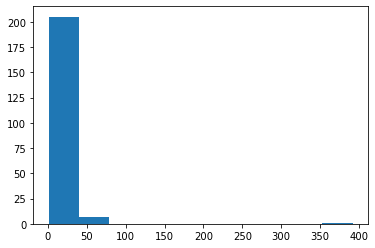

In [16]:
fig1, ax1 = plt.subplots()
ax1.hist(fb_df5['count'])
plt.show()

This data is not 'normal' there is one webiste that I visit quite often and many websites or apps that I do not visit often or just visited one time

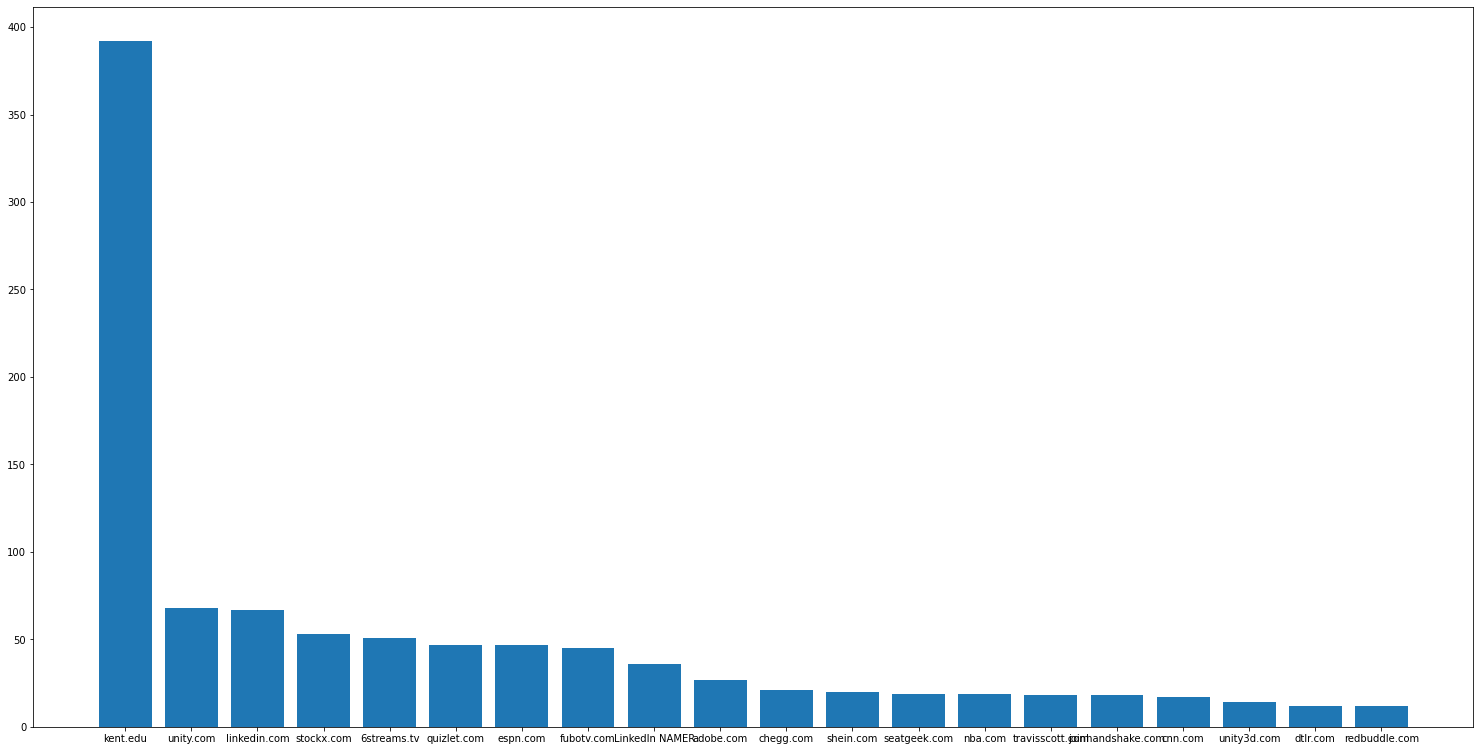

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_figwidth(20)
fig.set_figheight(10)
sites = ['kent.edu', 'unity.com', 'linkedin.com', 'stockx.com', '6streams.tv', 'quizlet.com', 'espn.com', 'fubotv.com', 'LinkedIn NAMER', 'adobe.com', 'chegg.com', 'shein.com', 'seatgeek.com', 'nba.com', 'travisscott.com', 'joinhandshake.com', 'cnn.com', 'unity3d.com', 'dtlr.com', 'redbuddle.com']
count = [392,68,67,53,51,47,47,45,36,27,21,20,19,19,18,18,17,14,12,12]
ax.bar(sites,count)
plt.show()

The data from this plot shows that I had one site that I visited way more than others. Facebook could conclude that I would maybe be a student and show me ads for things that college students might need or want.

The two albums I will be looking at are the two we looked at in class, because I dont know how to pull in my own data with the Spotify API and credientals. The albums are 'Midnights' by Taylor Swift and 'Loneliest' by Carly Rae Jepsen.

In [18]:
albums = pd.read_csv('audio_features.csv', sep = ',')

In [19]:
albums.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0,0.735,0.444,10,-10.519,1,0.0684,0.2040,0.001200,0.1700,0.0984,97.038,audio_features,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,https://api.spotify.com/v1/tracks/4g2c7NoTWAOS...,https://api.spotify.com/v1/audio-analysis/4g2c...,202396,4,midnights
1,1,0.658,0.378,7,-8.300,1,0.0379,0.0593,0.000000,0.0976,0.0382,108.034,audio_features,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,https://api.spotify.com/v1/tracks/199E1RRrVmVT...,https://api.spotify.com/v1/audio-analysis/199E...,218271,4,midnights
2,2,0.638,0.634,4,-6.582,1,0.0457,0.1330,0.000001,0.1520,0.5190,96.953,audio_features,02Zkkf2zMkwRGQjZ7T4p8f,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,https://api.spotify.com/v1/tracks/02Zkkf2zMkwR...,https://api.spotify.com/v1/audio-analysis/02Zk...,200690,4,midnights
3,3,0.659,0.323,9,-13.425,1,0.0436,0.7350,0.003210,0.1160,0.1540,110.007,audio_features,6ADDIJxxqzM9LMpm78yzQG,spotify:track:6ADDIJxxqzM9LMpm78yzQG,https://api.spotify.com/v1/tracks/6ADDIJxxqzM9...,https://api.spotify.com/v1/audio-analysis/6ADD...,256124,4,midnights
4,4,0.694,0.380,2,-10.307,1,0.0614,0.4160,0.000008,0.1260,0.3760,120.044,audio_features,7gVWKBcfIW93YxNBi3ApIE,spotify:track:7gVWKBcfIW93YxNBi3ApIE,https://api.spotify.com/v1/tracks/7gVWKBcfIW93...,https://api.spotify.com/v1/audio-analysis/7gVW...,194207,4,midnights


First, I will look at the loudness and the energy of the two albums. 

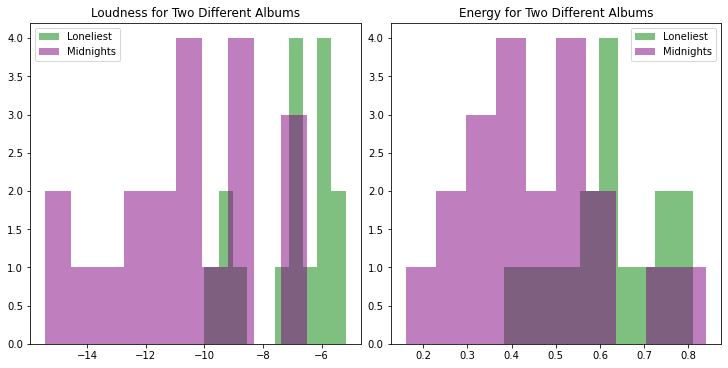

In [45]:
fig1, ax1 = plt.subplots(1, 2, layout = "constrained")
fig1.set_figheight(5)
fig1.set_figwidth(10)
mid = albums[albums['album'] == 'midnights']
lon = albums[albums['album'] == 'loneliest']

ax1[0].hist(lon['loudness'], alpha = 0.5, label = 'Loneliest', color = 'green')
ax1[0].hist(mid['loudness'], alpha = 0.5, label = 'Midnights', color = 'purple')
ax1[0].set_title('Loudness for Two Different Albums')
ax1[0].legend()

ax1[1].hist(lon['energy'], alpha = 0.5, label = 'Loneliest', color = 'green')
ax1[1].hist(mid['energy'], alpha = 0.5, label = 'Midnights', color = 'purple')
ax1[1].set_title('Energy for Two Different Albums')
ax1[1].legend()

plt.show()

Based off of these two features, you can conclude that Carly Rae Jepsen's album, Loneliest, is both louder, and higher in energy than Taylor Swift's album, Midnights.

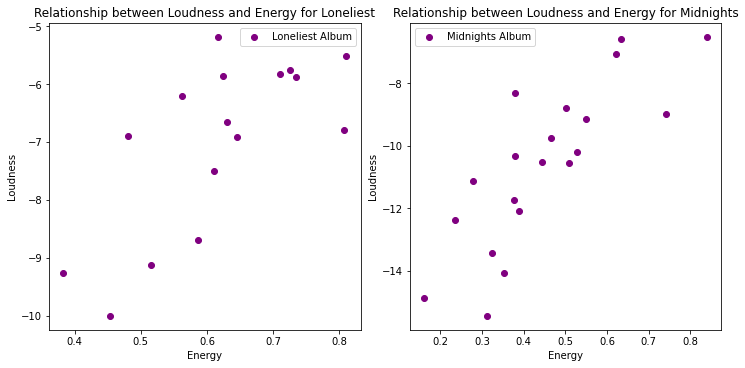

In [65]:
fig1, ax1 = plt.subplots(1, 2, layout = "constrained")
mid = albums[albums['album'] == 'midnights']
lon = albums[albums['album'] == 'loneliest']
fig1.set_figheight(5)
fig1.set_figwidth(10)

ax1[0].scatter(lon['energy'], lon['loudness'], label = 'Loneliest Album', color = 'purple')
ax1[0].set_xlabel('Energy')
ax1[0].set_ylabel('Loudness')
ax1[0].set_title('Relationship between Loudness and Energy for Loneliest')

ax1[1].scatter(mid['energy'], mid['loudness'], label = 'Midnights Album', color = 'purple')
ax1[1].set_xlabel('Energy')
ax1[1].set_ylabel('Loudness')
ax1[1].set_title('Relationship between Loudness and Energy for Midnights')

plt.show()

Text(0.5, 1.0, 'Relationship between Loudness and Energy for Midnights and Loneliest')

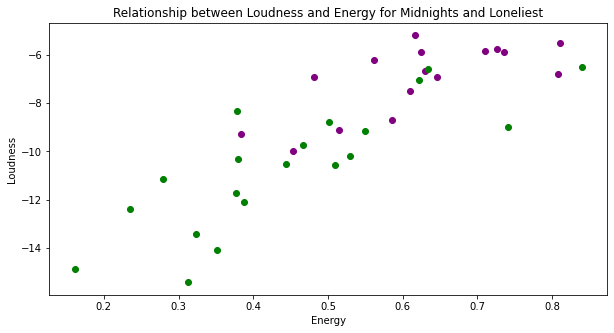

In [66]:
fig1, ax1 = plt.subplots()
mid = albums[albums['album'] == 'midnights']
lon = albums[albums['album'] == 'loneliest']
fig1.set_figheight(5)
fig1.set_figwidth(10)

ax1.scatter(lon['energy'], lon['loudness'], label = 'Loneliest Album', color = 'purple')
ax1.scatter(mid['energy'], mid['loudness'], label = 'Loneliest Album', color = 'green')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Loudness')
ax1.set_title('Relationship between Loudness and Energy for Midnights and Loneliest')

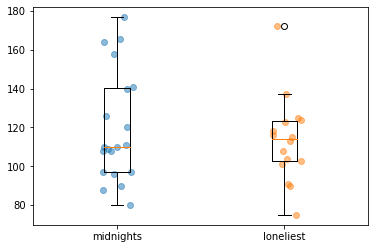

In [72]:
fig1, ax1 = plt.subplots()
mid = albums[albums['album'] == 'midnights']['tempo']
lon = albums[albums['album'] == 'loneliest']['tempo']

mid_x = [1] * len(mid)
lon_x = [2] * len(lon)
mid_x_jitter = np.random.uniform(-0.1, 0.1, len(mid_x))
lon_x_jitter = np.random.uniform(-0.1, 0.1, len(lon_x))

ax1.scatter(mid_x + mid_x_jitter, mid, alpha = 0.5)
ax1.scatter(lon_x + lon_x_jitter, lon, alpha = 0.5)
ax1.set_xlim(0.5, 2.5)
ax1.boxplot([mid, lon])
ax1.set_xticks([1,2], ['midnights', 'loneliest'])
plt.show()